# COMPARATIVE STUDY OF DIFFERENT MACHINE LEARNING MODELS FOR SALES PREDICTION AND FRAUD DETECTION.

# Introduction

In recent years, the rise of the Internet of things (IoT) as an emerging technology has been unbelievable, more companies are moving towards the adoption of these technologies and many IoT sensors are being deployed to share information in real-time which leads to the generation of a huge amount of data. This data when used correctly, will be very helpful to the company to discover hidden patterns for better decision making in the future. For example, with the DataCo company, dataset customer segmentation analysis was performed in this project which helps the company to better understand its customers and target them to increase customer responsiveness and the company's revenue. With a lot of options available to analyze data, it is very difficult to decide which method and machine learning model to use since the performance of the model vary on the parameters available in the data. 

With the growth of machine learning, there have been numerous comparison studies that compare the performance of neural networks with traditional linear techniques for forecasting. For example, author Carbonneau et al. (2007) in his research work compared various traditional forecasting time-series like moving average, linear regression with recurrent neural networks and support vector machines and concluded that recurrent neural networks performed best. Hill et al. (1996) have also considered the M-competition data and have compared between neural networks and traditional methods. Vakili et al. (2020) evaluated the performance of 11 popular machine and deep learning algorithms for classification task using six IoT-related datasets and concluded that Random Forests performed better than other machine learning models, while among deep learning models, ANN and CNN achieved more interesting results. Some other authors like Ahmed et al. (2010) did study comparing different regression models and concluded that the MLP model and Gaussian process models are the best two models for regression type data. But no study that compared both Classification type ML models and Regression type ML models against the Neural Network models with the same dataset was found.

This project aims to compare 9 popular machine learning classifiers and 7 regressors type machine learning models and measure their performance against neural network models to find out which machine learning model performs better. Since the dataset used is related to supply chain important parameters are identified and the machine learning models are trained with the dataset for detection of fraud transactions, late delivery of orders, sales revenue and quantity of products which customer orders. The machine learning classifiers used in this project are Logistic Regression,Linear Discriminant Analysis, Gaussian Naive Bayes, Support Vector Machines, k - Nearest Neighbors, Random Forest classification, Extra Trees classification, Extreme Gradient Boosting, Decision Tree classification for fraud detection and to predict late delivery on the basis accuracy, recall score and F1 score. The regression models used are Lasso, Ridge, Light Gradient boosting, Random Forest regression, Extreme Gradient Boosting regression, Decision Tree Regression, and Linear Regression to predict sales and quantity of the products required which are compared with mean absolute error (MAE) and root mean square error (RMSE).

### Importing all required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD
from tensorflow_core.estimator import inputs

#Hiding the warnings
warnings.filterwarnings('ignore') 


ModuleNotFoundError: No module named 'xgboost'

In [6]:
#Importing Dataset using pandas
dataset=pd.read_csv("../input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')
dataset.head(5)# Checking 5 rows in dataset

FileNotFoundError: [Errno 2] No such file or directory: '../input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv'

# Data Cleaning

In [3]:
dataset.shape

(180519, 53)

The total data set consists of 180519 records and 53 columns

In [4]:
dataset.apply(lambda x: sum(x.isnull())) #Checking missing values

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


The data consists of some missing values from Customer Lname, Product Description, Order Zipcode and, Customer Zipcode which should be removed or replaced before proceeding with the analysis. And also, since there is a chance different customers might have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.

In [5]:
# Adding first name and last name together to create new column
dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str)

To make it easier for analysis some unimportant columns are dropped

In [6]:
data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data.shape

(180519, 42)


There are 3 missing values in Customer Zipcode column. Since the missing values are just zip codes which are not very important these are replaced with zero before proceeding with data analysis.

In [7]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)#Filling NaN columns with zero

# Data Visualisation

To find important parameters, data correlation is performed.

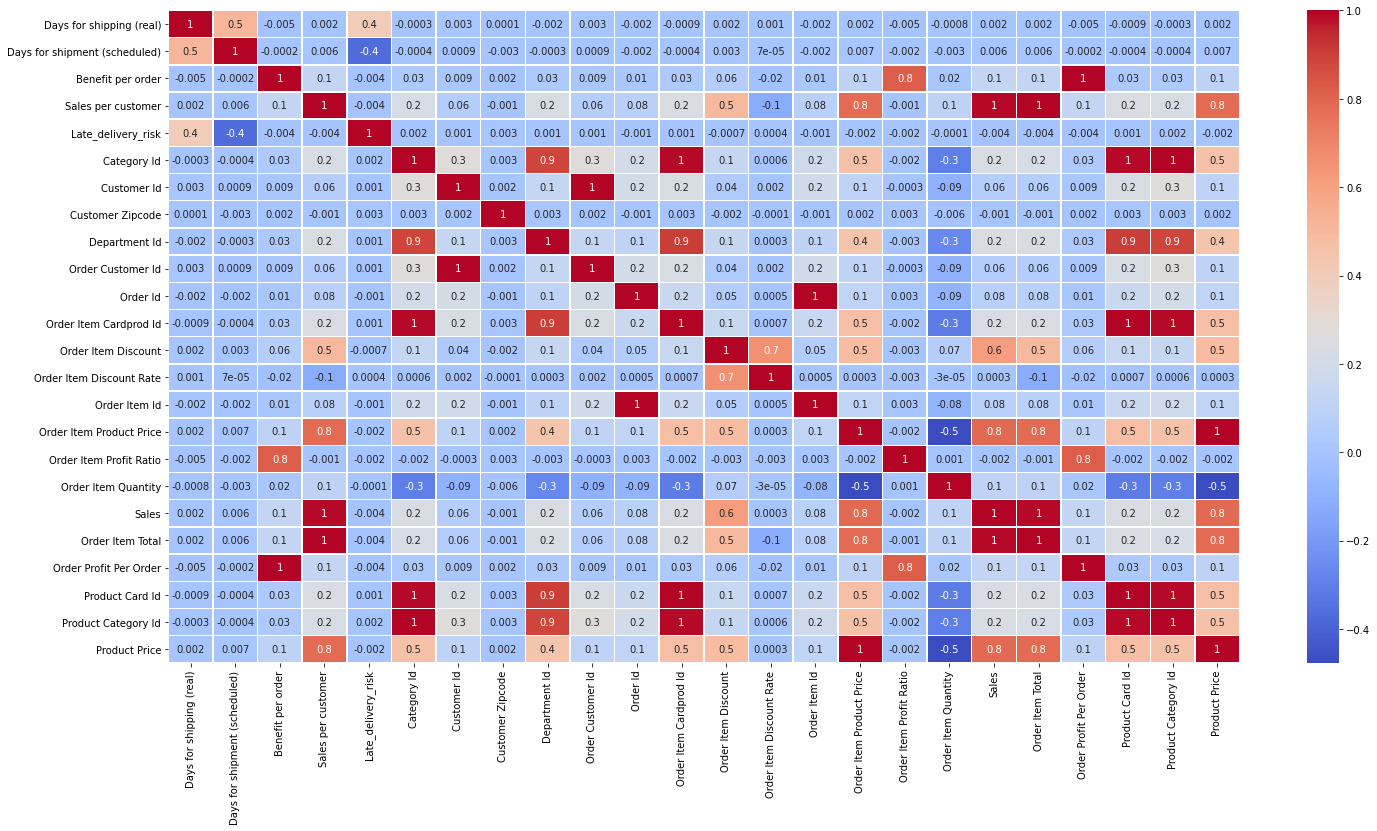

In [8]:
fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

We can observe that product price price has high correlation with Sales,Order Item Total.

As the data which is being used for analysis is related to Supply chain, it makes sense to find which region has most sales? It can be found by using groupby method which will segregate similar market regions together and add all sales for that particular region using 'sum' function.

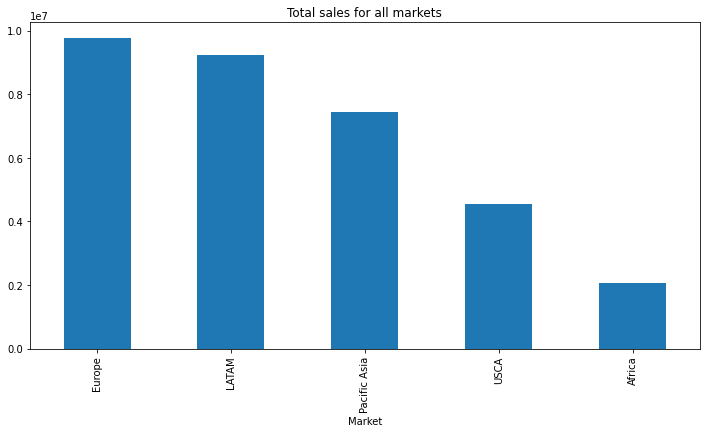

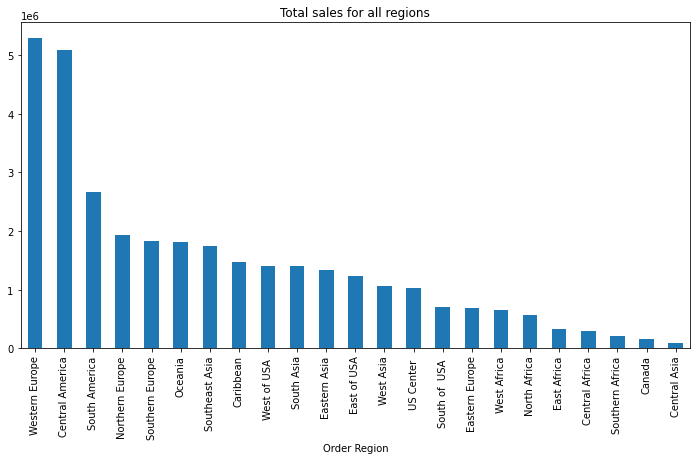

In [9]:
market = data.groupby('Market') #Grouping by market
region = data.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

It could be seen from the graph that European market has the most number of sales whereas Africa has the least.In these markets western europe regions and central america recorded highest sales. 

Which catergory of products has highest sales?The same method can be followed here to see the product category with highest sales

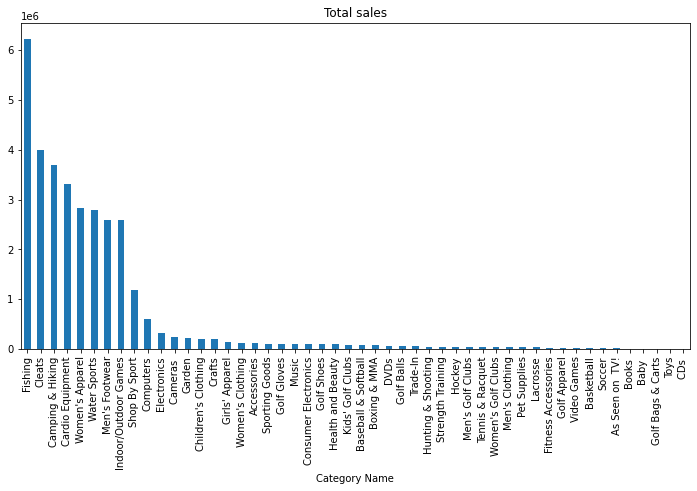

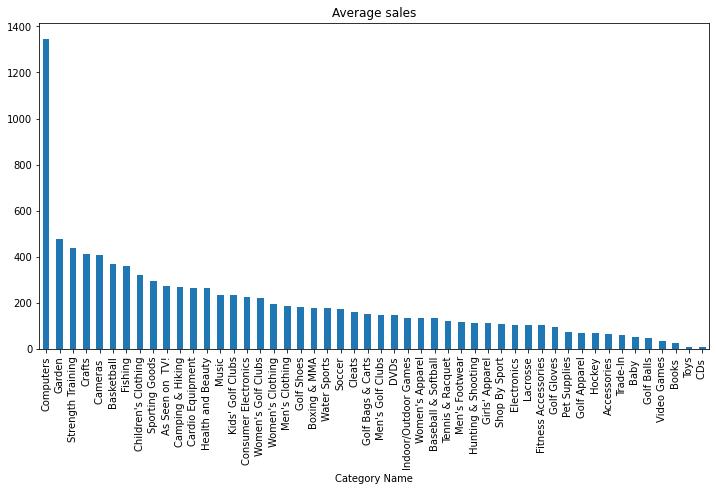

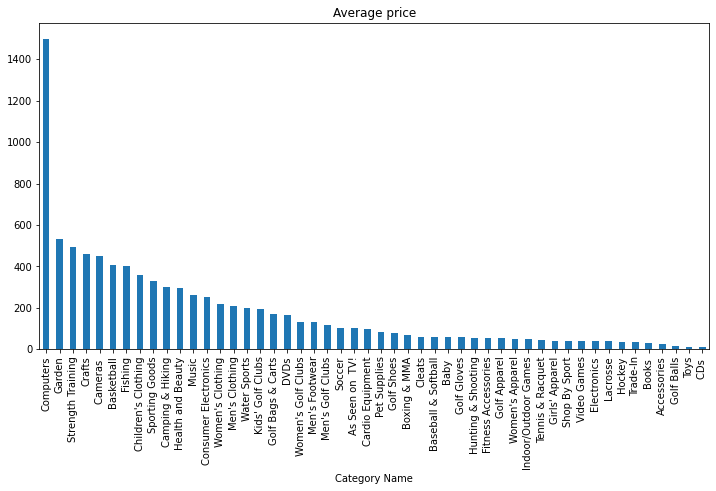

In [10]:
#Grouping all categories
cat = data.groupby('Category Name')
plt.figure(1)
# Total sum of sales for all categories
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

As we can see from fig 1 that the fishing category had most number of sales followed by the Cleats.However it is suprising to see that top 7 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$. Since correlation was high between Price and Sales it will be intresting to see how price is impacting the sales for all the products to see the trend.

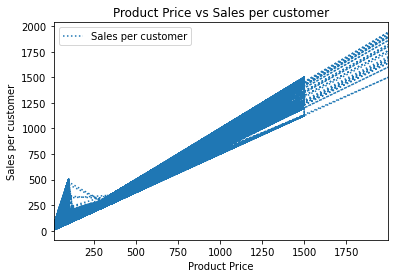

In [11]:
data.plot(x='Product Price', y='Sales per customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')#title
plt.xlabel('Product Price')  # X-axis title
plt.ylabel('Sales per customer') # Y=axis title
plt.show()

It can be observed that prices has linear relation with sales. Which quarter recorded highest sales? It can be found  by dividing order time into years,months,week day,hour to better observe the trend.

In [12]:

data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday_name
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

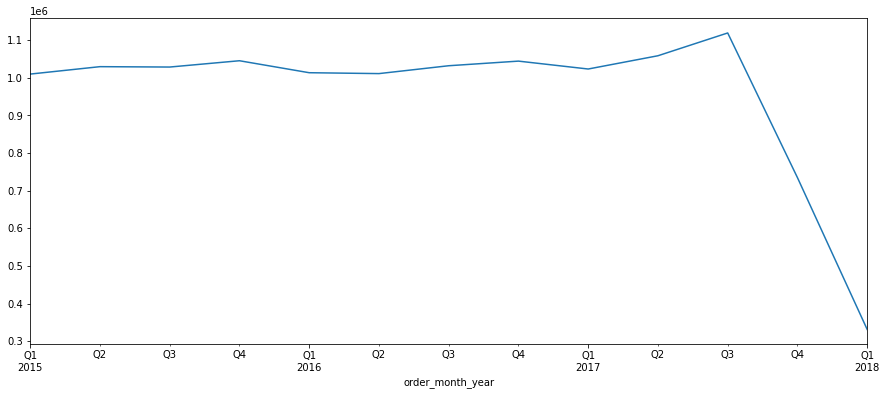

In [13]:
quater= data.groupby('order_month_year')
quartersales=quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

By seeing above graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018. What is the purchase trend in week days,hours and months?

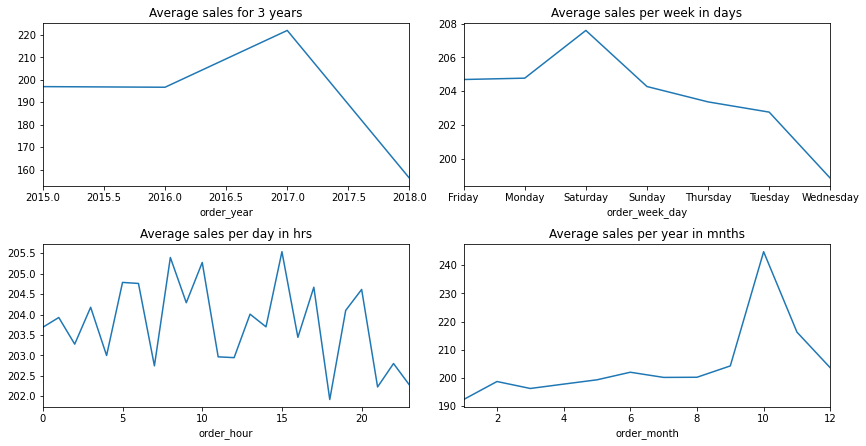

In [14]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= data.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

How price is impacting sales, when and which products are having more sales are found.The most number of orders came in October followed by November, and orders for all other months are consistent.Highest number of orders are placed by customers in 2017. 
Saturday recorded highest number of average sales and wednesday with the least number of sales. The average sales are consistent throughout the day irrespective of time with std of 3.

It is also important to know what type of payment method is being preferred by people to buy all these products in all regions? It can be found using .unique() method to see different payment methods.

In [15]:
data['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

It is found that four types of payment methods are used.Which payment method is preferred the most by people in different regions?

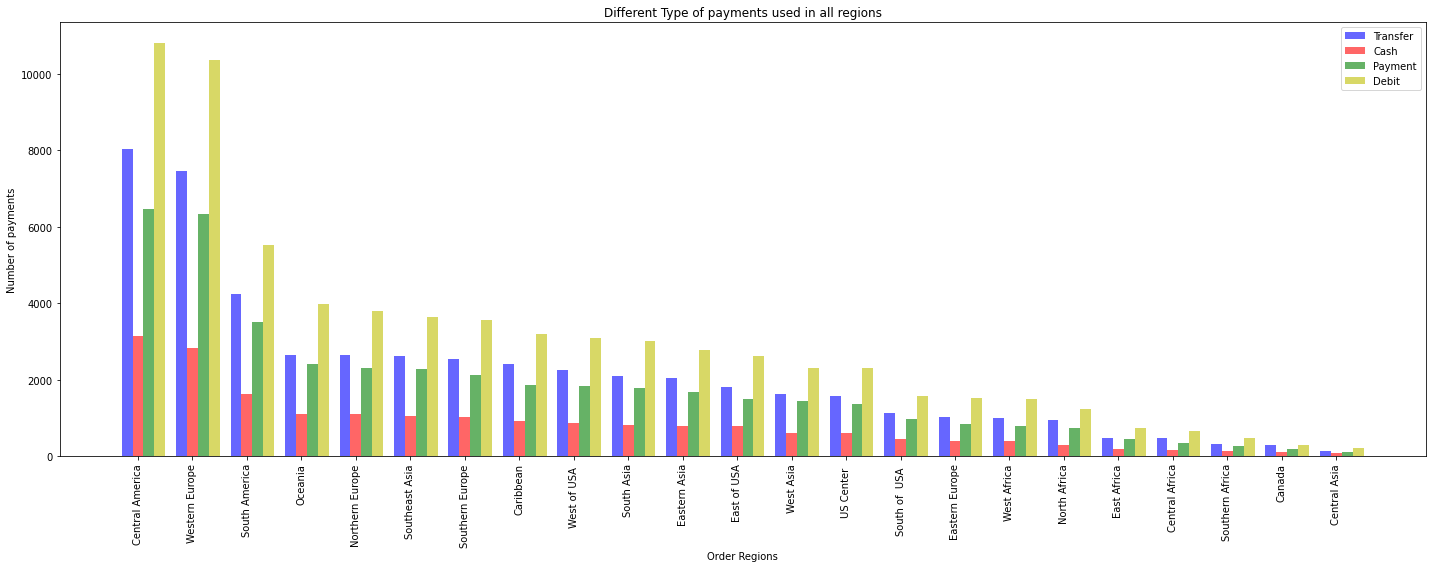

In [16]:
#xyz = data.groupby('Type')
xyz1 = data[(data['Type'] == 'TRANSFER')]
xyz2= data[(data['Type'] == 'CASH')]
xyz3= data[(data['Type'] == 'PAYMENT')]
xyz4= data[(data['Type'] == 'DEBIT')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()


Debit type is most preferred payment method by people in all regions, Cash payment being the least preferred method.

Some products are having negative benefit per orders which indicates that the orders are generating loss of revenue to the company. Which products are these?

Total revenue lost with orders -3883547.345768667


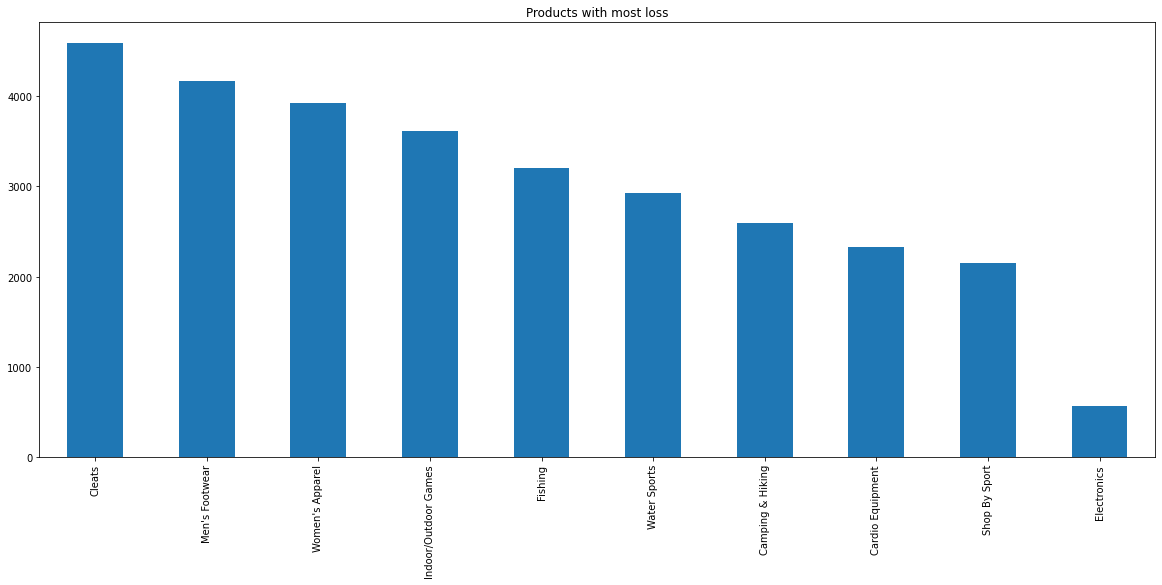

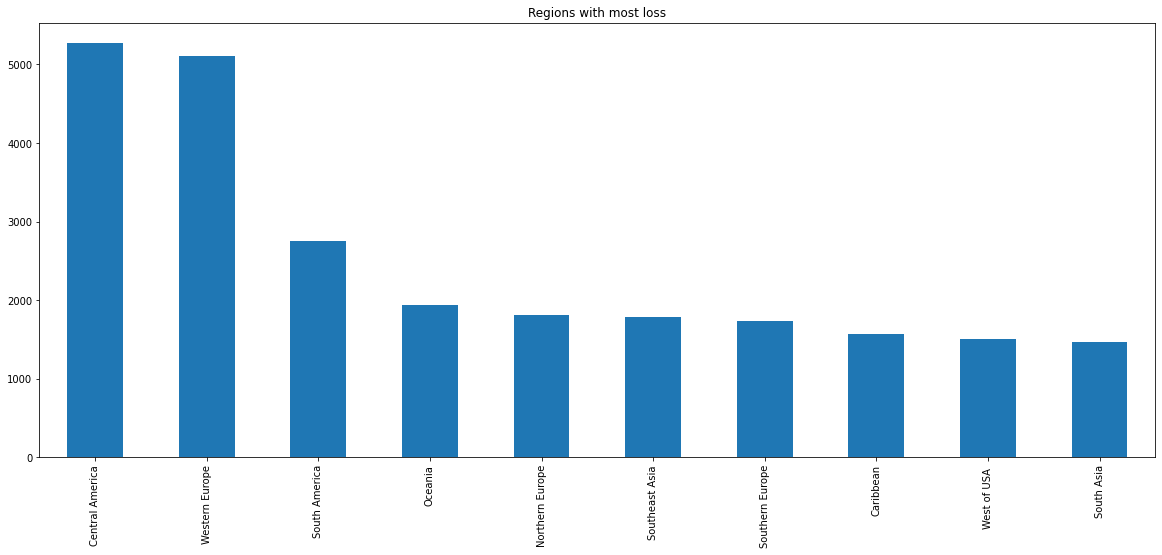

In [17]:
loss = data[(data['Benefit per order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['Benefit per order'].sum())

The total loss sales are approximately 3.9 Millions which is an huge amount.It can be seen that Cleats is the category with most loss sales followed by Mens footwear.Most lost sales are happeing in central america and western europe region.This lost sales may have happened due to suspected frauds or late deliveries.

Finding which payment method is used to conduct frauds can be useful to  prevent fraud from happening in future

In [18]:
#Checking type of payment used to conduct fraud other than Transfer
xyz = data[(data['Type'] != 'TRANSFER')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
xyz['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

It can be clearly seen that there are no frauds conducted with DEBIT,CASH,PAYMENT methods so all the suspected fraud orders are made using wire transfer probably from abroad. Which region and what product is being suspected to the fraud the most? 

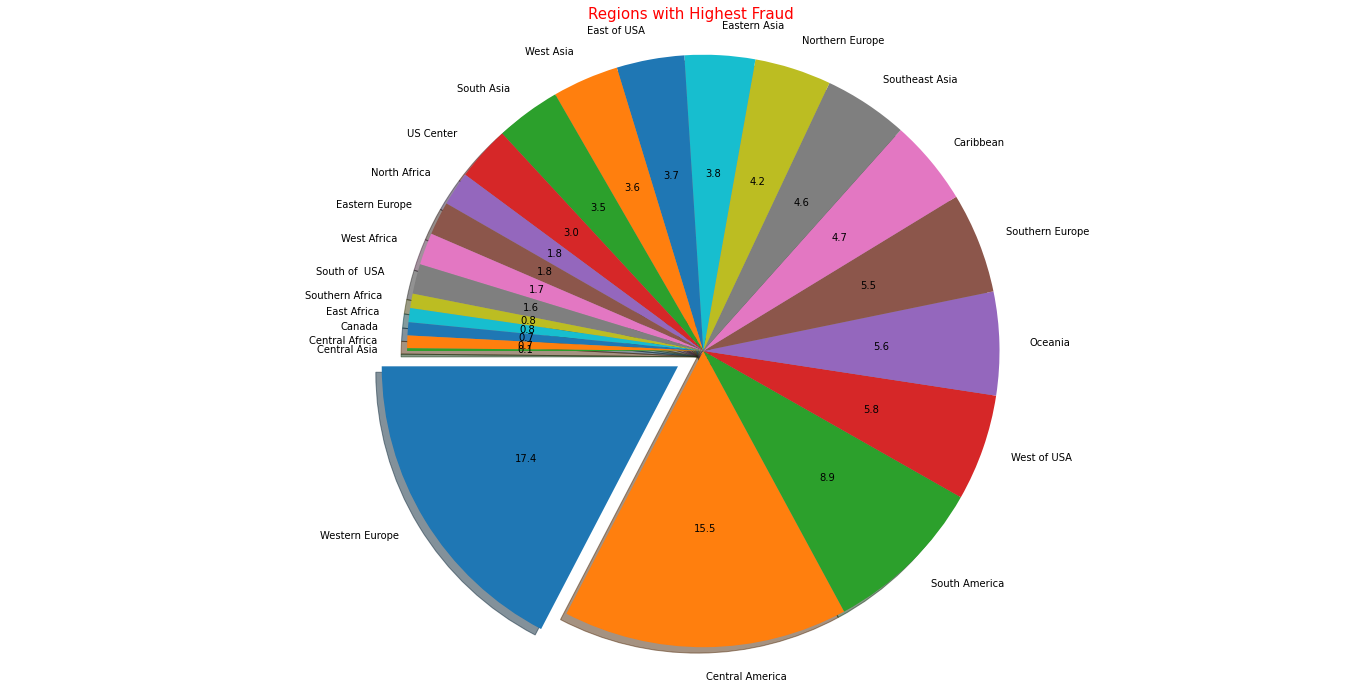

In [19]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='r') # Plotting title
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

It can be observed that highest number of suspected fraud orders are from Western Europe which is approximately 17.4% of total orders followed by Central America with 15.5%. Which product is being suspected fraud the most?

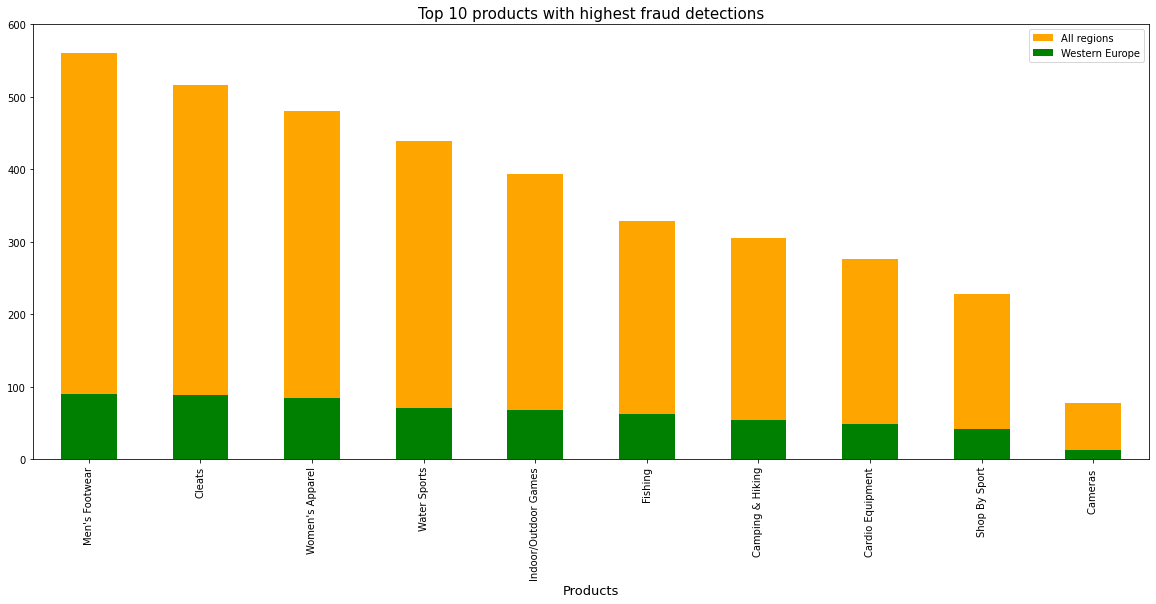

In [20]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

It is very suprising to see that cleats department is being suspected to fraud the most followed by Men's footwear in all the regions and also in Western Europe.Which customers are conducting all these fraud?

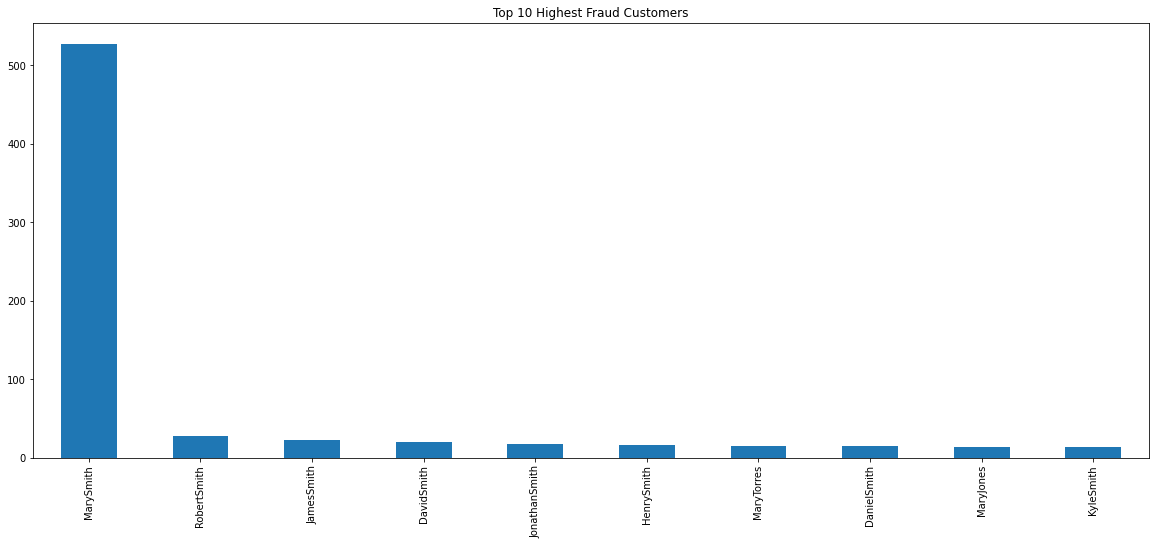

In [21]:
#Filtering out suspected fruad orders
cus = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
#Top 10 customers with most fraud
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

The customer named Mary Smith alone was responible for trying to conduct fraud 528 times which is very shocking .How  much amount exactly did she conduct fraud orders?

In [22]:
#Filtering orders of mary smith with suspected fraud
amount = data[(data['Customer Full Name'] == 'MarySmith')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
#Plotting bar chart for top 10 most suspected fraud customers
amount['Sales'].sum()

102491.66191043999

The total amount was almost 102k which is very huge amount.Since Mary was using different address every time when placing orders, a new customer id was issued each time which makes it difficult to identify the customer and ban them. All these parameters should be taken into consideration to improve fraud detection algorithm so fraud can be identified more accurately.

Delivering products to customer on time without late delivery is another important aspect for a supply chain company because customers will not be satisfied if products are not delivered on time. What  category of products are being delivered late the most?

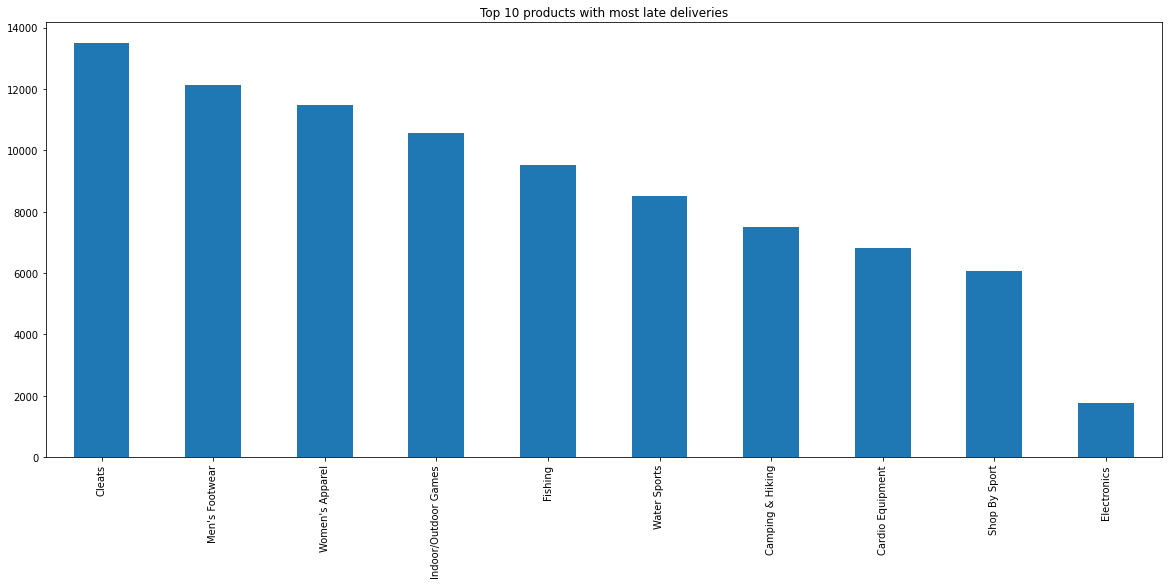

In [23]:
#Filtering columns with late delivery status
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")


It can be seen that orders with Cleats department is getting delayed the most followed by Men's Footwear.For some orders risk of late delivery is given in data.The products with late delivery risk are compared with late delivered products. 

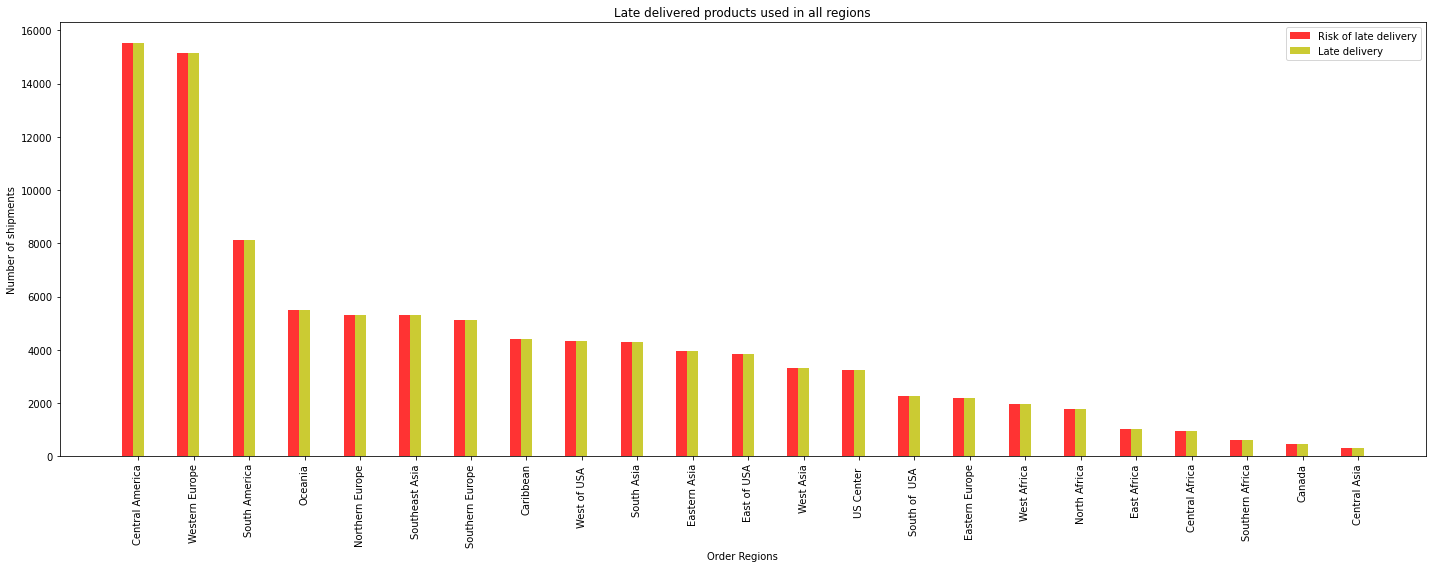

In [24]:
#Filtering orders with late delivery risk
xyz1 = data[(data['Late_delivery_risk'] == 1)]
#Filtering late delivered orders
xyz2 = data[(data['Delivery Status'] == 'Late delivery')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8)) #Figure size
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='r',label='Risk of late delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='y',label='Late delivery')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()


Thus,it can be concluded that for all the products with late delivery risk irrespective of region the product is actually being delivered late,to avoid late delivery the company can ship products faster using better shipping method or schedule more time of Days for shipment so customers will know in advance when the products will reach them. It will be interesting to see the number of late deliveried orders for different types of shipment method in all regions.

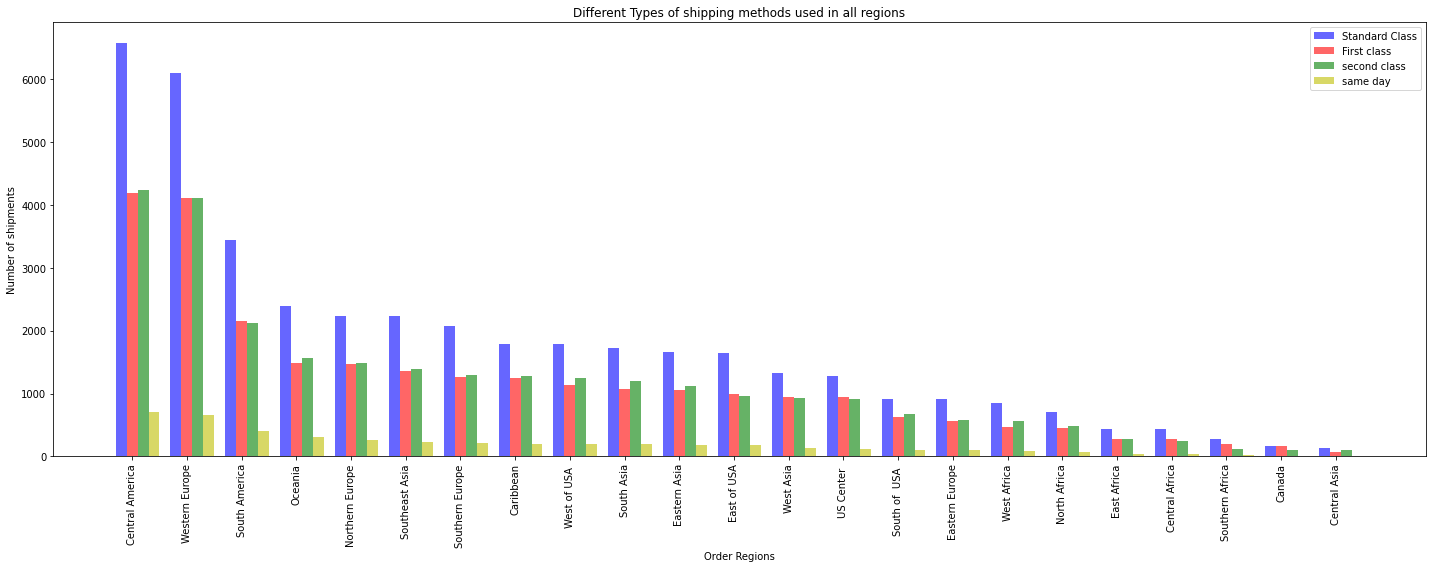

In [25]:
#Filtering late delivery orders with standard class shipping
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
#Filtering late delivery orders with first class shipping
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
#Filtering late delivery orders with second class shipping
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
#Filtering late delivery orders with same day shipping
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]
#Counting total values
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

As expected the most number of late deliveries  for all regions occured with standard class shipping,with same day shipping being the one with least number of late deliveries.Both the first class and second class shipping have almost equal number of late deliveries.

# Customer Segmentation

Understanding customer needs and targeting specific clusters of customers based on their need is one way for a supply chain company to increase number of customers and also to gain more profits.Since,purchase history of customers is already avaialble in the dataset, it can use RFM analysis for customer segmention. Even though there are so many different methods for customer segmentation,RFM analysis is being used because it utilizes numerical values to show Customer recency,frequency and monetary values and also the output results are easy to interpret.

In [26]:
#Calculating total price for which each order
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']# Multiplying item price * Order quantity

In [31]:
data['order date (DateOrders)'].max() # Calculating when the last order come to check recency

Timestamp('2018-01-31 23:38:00')

The last order in the dataset was made on 2018-01-31. So the present time is set slightly above than the last order time for more accuracy of recency value.

In [28]:
#Present date was set to next day of the last order. i.e,2018-02-01
present = dt.datetime(2018,2,1)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [32]:
# Grouping all values into new data frame named customer segmentation
Customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
#Changing order dates to int format
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


R_Value(Recency) indicates how much time elapsed since a customer last order.

F_Value(Frequency) indicates how many times a customer ordered.

M_Value(Monetary value) tells us how much a customer has spent purchasing items.

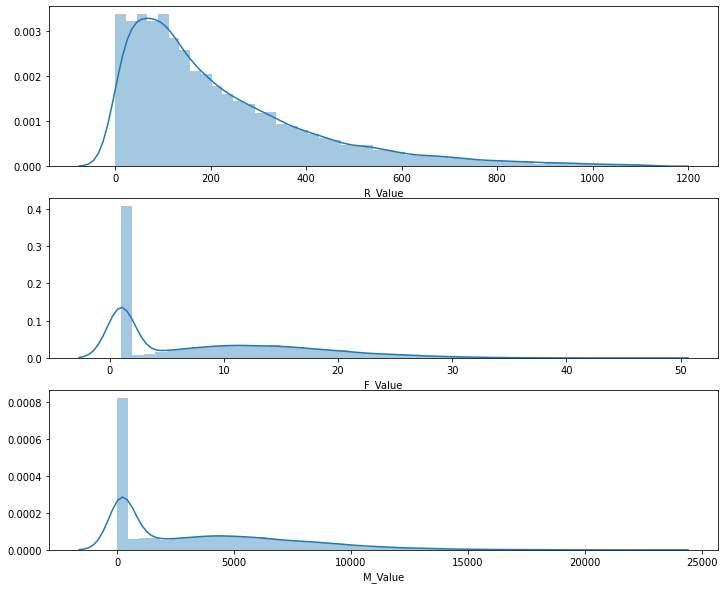

In [33]:
plt.figure(figsize=(12,10)) # Figure size
plt.subplot(3, 1, 1)
sns.distplot(Customer_seg['R_Value'])# Plot distribution of R_Value
plt.subplot(3, 1, 2) 
sns.distplot(Customer_seg['F_Value'])# Plot distribution of F_Value
plt.subplot(3, 1, 3)
sns.distplot(Customer_seg['M_Value'])# Plot distribution of M_Value
plt.show()

In [34]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict() 

The total data is divided into 4 quantiles. The R_Value should be low because it indicates recent customer activity and F_value, M_Value should be high since they indicate frequency and total value of purchase. Function is defined to indicate quantiles as numerical values.

In [35]:
# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [36]:
# New column for R_Score to indicate numerical score between 1 to 4.
Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,4,4,3
2,136,10,2842.700073,2,2,2
3,229,18,6143.760057,3,1,1
4,380,14,4370.629991,4,2,2
5,457,7,2993.790032,4,3,2


The individual scores of R,F,M are known.A column for combined RFM score is created.

In [37]:
#Adding R,F,M Scores to one new column
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + Customer_seg.M_Score.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,792,1,2362.250061,4,4,3,443
2,136,10,2842.700073,2,2,2,222
3,229,18,6143.760057,3,1,1,311
4,380,14,4370.629991,4,2,2,422
5,457,7,2993.790032,4,3,2,432


How many different customer segments are there in total can be found using .unique() and len method.

In [38]:
count=Customer_seg['RFM_Score'].unique()
print(count)# Printing all Unique values
len(count)# Total count

['443' '222' '311' '422' '432' '421' '211' '322' '434' '212' '411' '331'
 '412' '433' '321' '423' '333' '312' '221' '223' '332' '233' '232' '323'
 '444' '431' '343' '243' '344' '334' '244' '143' '144']


33

It can be seen that there are 33 different customer segments. To make it easier for segmentation individual R,F,M scores are added together

In [39]:
# Calculate RFM_Score
Customer_seg['RFM_Total_Score'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg['RFM_Total_Score'].unique()

array([11,  6,  5,  8,  9,  7,  4, 10, 12])

There are 9 values in total for customer segmentation.Appropriate names were assigned for each value seperately.

In [40]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return 'Champions' 
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk'
    else:                               # For RFM score with value less than 5
        
        return 'Lost'
# Create a new variable RFM_Level
Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
Customer_seg.head()


,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
1,792,1,2362.250061,4,4,3,443,11,Champions
2,136,10,2842.700073,2,2,2,222,6,Cant lose them
3,229,18,6143.760057,3,1,1,311,5,At Risk
4,380,14,4370.629991,4,2,2,422,8,Promising
5,457,7,2993.790032,4,3,2,432,9,Recent Customers


How many customers are present in each segment?

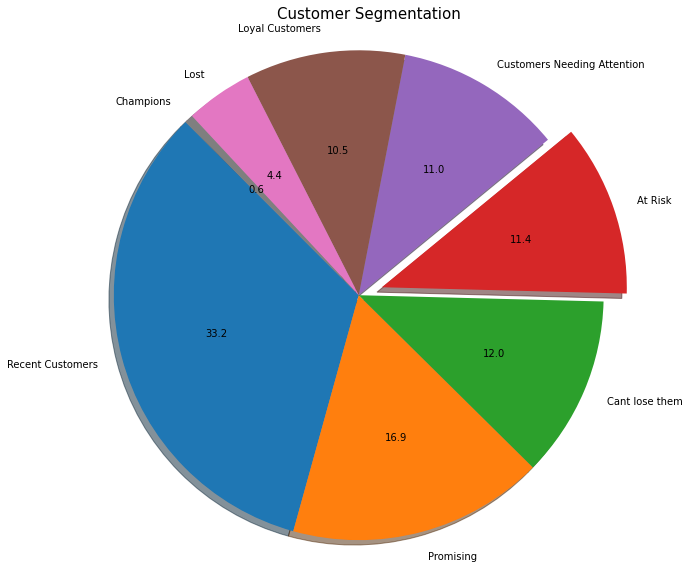

In [41]:
# Calculate average values for each RFM_Level, and return a size of each segment 
Customer_seg['Customer_Segmentation'].value_counts().plot.pie(figsize=(10,10),
                                        startangle=135, explode=(0,0,0,0.1,0,0,0,0),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

Since total customers are divided into 9 segments it can be seen that, 11.4% customers are at risk of losing them as customers and 11% customers needs attention else even they will be lost eventually.It can be seen that 4.4% of customers are already lost. 

Our Top 10 Churned best customers who has not purchased anything in a while

In [42]:
churned=Customer_seg[(Customer_seg['RFM_Score']=='411')].sort_values('M_Value', ascending=False).head(10)
churned

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
11065,309,41,18641.300091,4,1,1,411,6,Cant lose them
6285,332,37,18287.010097,4,1,1,411,6,Cant lose them
7892,392,29,17620.470196,4,1,1,411,6,Cant lose them
2893,312,24,17536.609842,4,1,1,411,6,Cant lose them
4181,425,29,17333.960094,4,1,1,411,6,Cant lose them
4781,502,31,17048.380088,4,1,1,411,6,Cant lose them
9271,344,35,17044.910217,4,1,1,411,6,Cant lose them
4659,417,27,16973.060024,4,1,1,411,6,Cant lose them
1695,326,33,16916.020176,4,1,1,411,6,Cant lose them


These customers used to place orders with huge amounts very frequently but they did not place orders from almost a year which means they are purchasing from other companies. These groups of people should be targeted with offers to gain them back.

Top 10 new best customers who place costly orders often.

In [43]:
#The R_Score should be low and F_Score, M_Score should be as high as possible
Customer_seg[(Customer_seg['RFM_Score']=='144')|(Customer_seg['RFM_Score']=='143')].sort_values('M_Value', ascending=False).head(10)


,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
18101,38,1,1500.0,1,4,3,143,8,Promising
18083,39,1,1500.0,1,4,3,143,8,Promising
18047,39,1,1500.0,1,4,3,143,8,Promising
18065,39,1,1500.0,1,4,3,143,8,Promising
18119,38,1,1500.0,1,4,3,143,8,Promising
18046,39,1,1485.0,1,4,3,143,8,Promising
18100,38,1,1485.0,1,4,3,143,8,Promising
18118,38,1,1485.0,1,4,3,143,8,Promising
18064,39,1,1485.0,1,4,3,143,8,Promising


The above customers has the potential to become best customers this people should be targeted to convert them into loyal customers.All these different segment of customers should be targeted with different tailored advertisments and rewards for increased profits and more responsiveness from customers.

# Data Modelling

To measure the performance of different models the machine learning models are trained to detect fraud,late delivery for classification type. And sales, order quantity is predicted for regression type models.

A new dataset is created with the copy of original data for training the data and validation.

In [44]:
train_data=data.copy()

Two new columns are created for orders with suspected fraud and late delivery making them into binary classification, which in turn helps to measure performance of different models better.

In [45]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

Now to measure machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late. And Order Status column because, a new column for fraud detection is created there is a chance machine learning model might take values directly from these columns to predict output.

In [46]:
#Dropping columns with repeated values
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [47]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

There are some columns with object type data which cannot be trained in machine learning models so all the object type data is converted to int type using preprocessing label encoder library.

In [49]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])

#display the initial records
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,327.75,3,1876,2018,1,6,22,314.640015,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,327.75,3,5378,2018,1,2,12,311.359985,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,327.75,3,4429,2018,1,2,12,309.720001,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,327.75,3,12929,2018,1,2,11,304.809998,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,327.75,3,10638,2018,1,2,11,298.250000,0,0


Now all the data is transformed into int type. The dataset is split into train data and test data so model can be trained with train data and the performance of model can be evaluated using test data.

## Comparision of Classification Models

In [50]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
#All columns expect fraud
xl=train_data.loc[:, train_data.columns != 'late_delivery']
#Only fraud column
yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

Since there are so many different variables with different ranges standard scaler is used to standardize total the data so it is internally consistent before training the data with machine learning.

In [51]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

The data is now ready to be used in machine learning models since many different models are compared training every model from begining is complicated so a function is defined to make the process bit easy. The output is in binary classification format so all the models are measured with Accuracy score,recall score and F1 score metrics. 

To measure the performance of different models F1 score is used as the main metric because it is the harmonic mean of precison score and recall score.And all the scores are multiplied with 100 for better understanding

In [52]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    model_l=model_l.fit(xl_train,yl_train) # Fitting train data for predection of late delivery
    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)  
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

### Logistic classification model

In [53]:
model_f = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
model_l = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
#Giving inputs to the defined function
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy of fraud status is        : 97.80356747174828 %
Recall score of fraud status is        : 59.4059405940594 %
Conf Matrix of fraud status is        :
 [[35131   123]
 [  670   180]]
F1 score of fraud status is        : 31.222896790980055 %
Accuracy of late delivery status is: 98.84777309993352 %
Recall score of late delivery status is: 97.9419185672587 %
Conf Matrix of late delivery status is: 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is: 98.96025993501625 %


### Gaussian naive bayes model

In [54]:
model_f = GaussianNB()
model_l = GaussianNB()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy of fraud status is        : 87.84899180146243 %
Recall score of fraud status is        : 16.23066641206798 %
Conf Matrix of fraud status is        :
 [[30867  4387]
 [    0   850]]
F1 score of fraud status is        : 27.928371940200424 %
Accuracy of late delivery status is: 57.27066253046754 %
Recall score of late delivery status is: 56.20386144236229 %
Conf Matrix of late delivery status is: 
 [[  882 15425]
 [    2 19795]]
F1 score of late delivery status is: 71.95957613101405 %


### Support vector machines

In [55]:
model_f = svm.LinearSVC()
model_l = svm.LinearSVC()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy of fraud status is        : 97.75648127631288 %
Recall score of fraud status is        : 57.09219858156028 %
Conf Matrix of fraud status is        :
 [[35133   121]
 [  689   161]]
F1 score of fraud status is        : 28.4452296819788 %
Accuracy of late delivery status is: 98.84777309993352 %
Recall score of late delivery status is: 97.9419185672587 %
Conf Matrix of late delivery status is: 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is: 98.96025993501625 %


### K nearest Neighbors classification

In [56]:
model_f = KNeighborsClassifier(n_neighbors=1)
model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Accuracy of fraud status is        : 97.3631730556171 %
Recall score of fraud status is        : 41.904761904761905 %
Conf Matrix of fraud status is        :
 [[34888   366]
 [  586   264]]
F1 score of fraud status is        : 35.67567567567568 %
Accuracy of late delivery status is: 80.82483935298028 %
Recall score of late delivery status is: 83.45634095634095 %
Conf Matrix of late delivery status is: 
 [[13124  3183]
 [ 3740 16057]]
F1 score of late delivery status is: 82.26554294643542 %


### Linear Discriminant Analysis

In [57]:
model_f = LinearDiscriminantAnalysis()
model_l = LinearDiscriminantAnalysis()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Accuracy of fraud status is        : 97.88389098160869 %
Recall score of fraud status is        : 56.574923547400616 %
Conf Matrix of fraud status is        :
 [[34970   284]
 [  480   370]]
F1 score of fraud status is        : 49.202127659574465 %
Accuracy of late delivery status is: 98.37137159317527 %
Recall score of late delivery status is: 97.68157672640619 %
Conf Matrix of late delivery status is: 
 [[15840   467]
 [  121 19676]]
F1 score of late delivery status is: 98.5277916875313 %


### Random forest classification

In [58]:
model_f = RandomForestClassifier()
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy of fraud status is        : 98.71205406603146 %
Recall score of fraud status is        : 98.73417721518987 %
Conf Matrix of fraud status is        :
 [[35249     5]
 [  460   390]]
F1 score of fraud status is        : 62.650602409638545 %
Accuracy of late delivery status is: 98.60680257035231 %
Recall score of late delivery status is: 97.52216748768473 %
Conf Matrix of late delivery status is: 
 [[15804   503]
 [ 

### Extra trees classification

In [59]:
model_f = ExtraTreesClassifier(n_estimators=100, max_depth=None,random_state=0)
model_l = ExtraTreesClassifier(n_estimators=100, max_depth=None,random_state=0)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)
Accuracy of fraud status is        : 98.61511189895856 %
Recall score of fraud status is        : 98.88268156424581 %
Conf Matrix of fraud status is        :
 [[35250     4]
 [  496   354]]
F1 score of fraud status is        : 58.609271523178805 %
Accuracy of late delivery status is: 99.17183691557722 %
Recall score of late delivery status is: 98.51214171974523 %
Conf Matrix of late delivery status is: 
 [[16008   299]
 [    0 19797]]
F1 sc

### eXtreme Gradient Boosting Classification

In [60]:
model_f = xgb.XGBClassifier()
model_l = xgb.XGBClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Accuracy of fraud status is        : 98.93640593840017 %
Recall score of fraud status is        : 89.8972602739726 %
Conf Matrix of fraud status is        :
 [[35195    59]
 [  325   525]]
F1 score of fraud status is        : 73.22175732217573 %
Accuracy of late delivery status is: 99.24662087303346 %
Recall score of late delivery status is: 98.65

### Decision tree classification

In [61]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy of fraud status is        : 99.12198094393972 %
Recall score of fraud status is        : 82.53968253968253 %
Conf Matrix of fraud status is        :
 [[35111   143]
 [  174   676]]
F1 score of fraud status is        : 81.00659077291792 %
Accuracy of late delivery status is: 99.37403057832927 %
Recall score of late delivery status is: 99.44918894335237 %
Conf Matrix of late delivery status is: 
 [[16198   109]
 [  117 19680]]
F1 score of late delivery status is: 99.4290910928106 %


For better understanding and comparision of all the scores a dataframe is created

In [103]:
#Giving column Values
classification_data = {'Classification Model':  ['Logistic','Gausian Naive bayes','Support Vector Machines','K nearest Neighbour',
                                'Linear Discriminant Analysis','Random Forest','Extra trees','eExtreme gradient boosting','Decision tree'],
        'Accuracy Score for Fraud Detection':     [97.80,87.84,97.75,97.36,97.88,98.48,98.61,98.93,99.12],
        'Recall Score for Fraud Detection':       [59.40,16.23,56.89,41.90,56.57,93.18,98.88,89.89,82.53],
        'F1 Score for Fraud Detection':           [31.22,27.92,28.42,35.67,49.20,54.57,58.60,73.22,81.00],
        'Accuracy Score for Late Delivery':       [98.84,57.27,98.84,80.82,98.37,98.60,99.17,99.24,99.37],
        'Recall Score for Late Delivery':         [97.94,56.20,97.94,83.45,97.68,97.52,98.51,98.65,99.44],
        'F1 Score for Late Delivery':             [98.96,71.95,98.96,82.26,98.52,98.74,99.25,99.31,99.42] }
#Creating data frame with Column Names
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model','Accuracy Score for Fraud Detection','Recall Score for Fraud Detection','F1 Score for Fraud Detection',
                                                                           'Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])


### Comparision Table for Classification Scores

In [104]:
classification_comparision #Printing dataframe

,Classification Model,Accuracy Score for Fraud Detection,Recall Score for Fraud Detection,F1 Score for Fraud Detection,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Logistic,97.80,59.40,31.22,98.84,97.94,98.96
1,Gausian Naive bayes,87.84,16.23,27.92,57.27,56.20,71.95
2,Support Vector Machines,97.75,56.89,28.42,98.84,97.94,98.96
3,K nearest Neighbour,97.36,41.90,35.67,80.82,83.45,82.26
4,Linear Discriminant Analysis,97.88,56.57,49.20,98.37,97.68,98.52
5,Random Forest,98.48,93.18,54.57,98.60,97.52,98.74
6,Extra trees,98.61,98.88,58.60,99.17,98.51,99.25
7,eExtreme gradient boosting,98.93,89.89,73.22,99.24,98.65,99.31
8,Decision tree,99.12,82.53,81.00,99.37,99.44,99.42


In [105]:
classification_comparision.max() #Checking max values in every column

Classification Model                  eExtreme gradient boosting
Accuracy Score for Fraud Detection                         99.12
Recall Score for Fraud Detection                           98.88
F1 Score for Fraud Detection                                  81
Accuracy Score for Late Delivery                           99.37
Recall Score for Late Delivery                             99.44
F1 Score for Late Delivery                                 99.42
dtype: object

[[](http://)](http://)Considering F1 score it is clear that Decision Tree classifier is performing better for classification type with F1 score of almost 80% for fraud detection and 99.42% for late delivery.Suprisingly, all the models expect gussian model predicted the late delivery of orders with almost 98% accuracy.Just to make sure that model is predicting correctly the model is cross validated and the results are compared with accuracy of the model.

### Cross validation

In [65]:
#Defining cross validation model
def cross_validation_model(model_f,model_l,xf,yf,xl,yl):
    model_f= model_f.fit(xf,yf)
    model_l = model_l.fit(xl,yl)
    scores_f = cross_val_score(model_f, xf, yf, cv=6)
    scores_l = cross_val_score(model_l, xl, yl, cv=6)
    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [66]:
cross_validation_model(model_f,model_l,xf,yf,xl,yl)

Model used is DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Cross validation accuracy of fraud: 0.96 (+/- 0.04)
Cross validation accuracy of late : 0.98 (+/- 0.02)


Since, the difference between cross validated scores and accuracy scores of the model is very minimal it can be confirmed that the data is neither overfitted or underfitted, Which variable was given more importance in the model is found using feature importance method from sklearn.

### Feature Importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

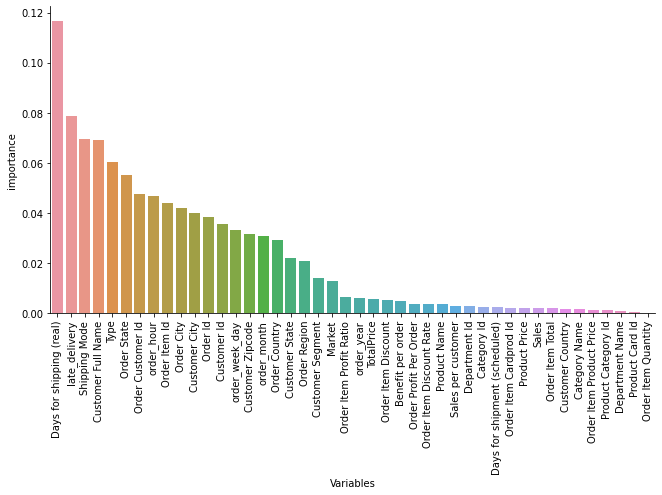

In [67]:
important_col=model_f.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':xf.columns[important_col],'importance':model_f.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

Even though fraud detection is not at all related to Days for shipping(real) it is very surprising to see it was given an importance of 0.12. All other important parameters like customer full name, shipping mode, type of payment used are given an importance of 0.7 which helps the company to detect fraud accurately when same customer is conducting fraud.

Same way which variables were given importance for prediction of late delivery is found.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

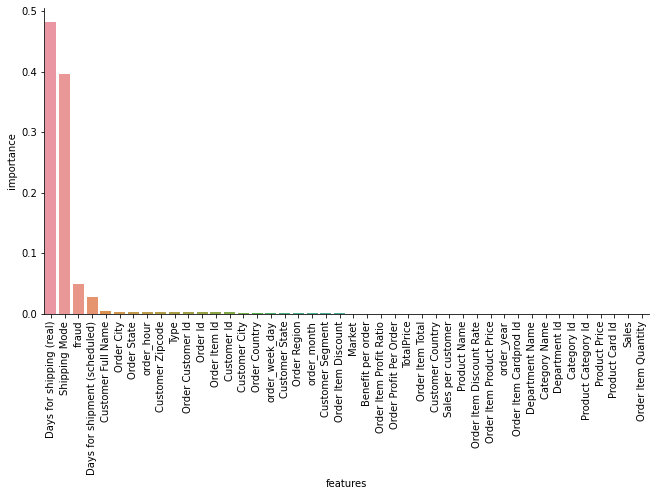

In [68]:
important_col=model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':xl.columns[important_col],'importance':model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

It can be seen that the columns for the days of shipping is given almost 90% importance in decision tree model,it will be interesting to see how well the model can predict when these variables are removed.

So a new model with the copy of train data is created
.

In [69]:
new_data=train_data.copy()

In [70]:
# Dropping columns in new data set
new_data=new_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

In [71]:
#All columns expect fraud
new_xl=new_data.loc[:, new_data.columns != 'late_delivery']
#Only fraud column
new_yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
new_xl_train, new_xl_test,new_yl_train,new_yl_test = train_test_split(new_xl,new_yl,test_size = 0.2,random_state = 42)

Standardizing data with Standardscaler module:

In [72]:
new_xl_train=sc.fit_transform(new_xl_train)
new_xl_test=sc.transform(new_xl_test)

Function for classification model is created to train one model

In [73]:
def New_classifiermodel(model_c,xc_train, xc_test,yc_train,yc_test):
    model_c=model_c.fit(xc_train,yc_train)
    yc_pred=model_c.predict(xc_test) 
    accuracy_c=accuracy_score(yc_pred, yc_test)
    recall_c=recall_score(yc_pred, yc_test,average='weighted')
    conf_c=confusion_matrix(yc_test, yc_pred)
    f1_c=f1_score(yc_test, yc_pred,average='weighted')
    print('Model paramters used are :',model_c)
    print('Accuracy         :', (accuracy_c)*100,'%')
    print('Recall score        :', (recall_c)*100,'%')
    print('Conf Matrix        : \n',(conf_c))
    print('F1 score       :', (f1_c)*100,'%')

### Decision Tree classification

In [74]:
new_model_l=tree.DecisionTreeClassifier()
New_classifiermodel(new_model_l,new_xl_train, new_xl_test,new_yl_train,new_yl_test)

Model paramters used are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy         : 83.65832040771106 %
Recall score        : 83.65832040771106 %
Conf Matrix        : 
 [[13259  3048]
 [ 2852 16945]]
F1 score       : 83.64916773492568 %


Even when shipping days variables were removed the F1 score and the accuracy of the new model is nearly 84% which is still pretty good. Which variables are given more importance this time?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

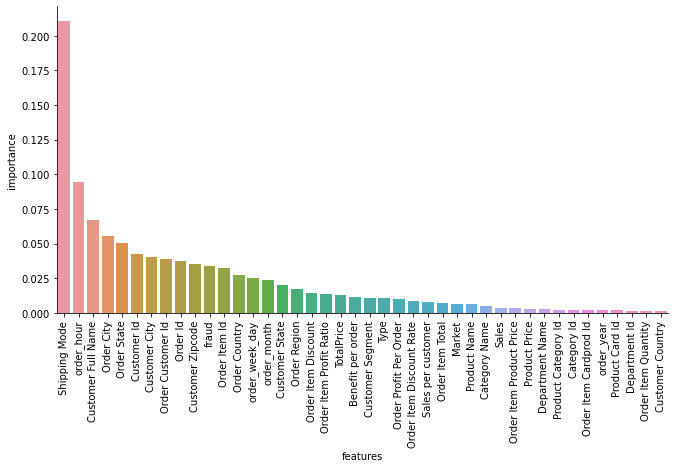

In [75]:
important_col=new_model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':new_xl.columns[important_col],'importance':new_model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

This time variables like shipping mode, order city,state are given more importance which helps company to use different shipping methods to deliver products faster.

Since Decision Tree classfier performed better for binary classification it will be interesting to see how well the model performs for multiclassification type data. So model was trained to predict order country.

In [76]:
#All columns expect order country
xc=train_data.loc[:, train_data.columns != 'Order Country']
#Order column country
yc=train_data['Order Country']
#Splitting 20% of dataset as test data 
xc_train, xc_test,yc_train,yc_test = train_test_split(xc,yc,test_size = 0.2, random_state = 42)

In [77]:
xc_train=sc.fit_transform(xc_train)
xc_test=sc.transform(xc_test)

### Decision Tree Multi Classification Model

In [78]:
model_c=tree.DecisionTreeClassifier()
New_classifiermodel(model_c,xc_train, xc_test,yc_train,yc_test)

Model paramters used are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy         : 99.78672723243962 %
Recall score        : 99.78672723243962 %
Conf Matrix        : 
 [[  35    0    0 ...    0    0    0]
 [   0    7    0 ...    0    0    0]
 [   0    0 1930 ...    0    0    0]
 ...
 [   0    0    0 ...    4    0    0]
 [   0    0    0 ...    0   46    0]
 [   0    0    0 ...    0    0   47]]
F1 score       : 99.78817212873459 %


Wow! It is really suprising to see F1 score of almost 100% to predict order country. So it can be concluded that the Decision Tree classifier works best for this dataset for classification type.

Decision Tree classifier is identified as the best model in all Machine learning models for Classification Type data. How well it can perform when compared with Neural Network model?

### Neural Network Model for Classification

In [79]:
keras.layers.BatchNormalization()
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(1024, activation='relu',kernel_initializer='random_normal', input_dim=44)) #Since we have 44 columns
#Third Hidden Layer
classifier.add(Dense(512, activation='relu',kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(256, activation='relu',kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(128, activation='relu',kernel_initializer='random_normal'))
#Sixth Hidden Layer
classifier.add(Dense(64, activation='relu',kernel_initializer='random_normal'))
#Seventh Hidden Layer
classifier.add(Dense(32, activation='relu',kernel_initializer='random_normal'))
#Eight Hidden Layer
classifier.add(Dense(16, activation='relu',kernel_initializer='random_normal'))
#Ninth Hidden Layer
classifier.add(Dense(8, activation='relu',kernel_initializer='random_normal'))
#Tenth Hidden Layer
classifier.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
#Eleventh Hidden Layer
classifier.add(Dense(2, activation='relu',kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))

Since output data is binary classification the binary_crossentropy is used to measure loss and accuracy is used as metric to train the model because F1 score is not available in Keras.

In [80]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

The model is trained with batch size of 512 and 10 epochs.

In [81]:
#Fitting the data to the training dataset
classifier.fit(xf_train,yf_train, batch_size=512, epochs=10)

Epoch 1/10
144415/144415 [==============================] - 3s 21us/step - loss: 0.6305 - accuracy: 0.9778
Epoch 2/10
144415/144415 [==============================] - 2s 12us/step - loss: 0.5218 - accuracy: 0.9778
Epoch 3/10
144415/144415 [==============================] - 2s 12us/step - loss: 0.4362 - accuracy: 0.9778
Epoch 4/10
144415/144415 [==============================] - 2s 12us/step - loss: 0.3689 - accuracy: 0.9778
Epoch 5/10
144415/144415 [==============================] - 2s 13us/step - loss: 0.3159 - accuracy: 0.9778
Epoch 6/10
144415/144415 [==============================] - 2s 12us/step - loss: 0.2741 - accuracy: 0.9778
Epoch 7/10
144415/144415 [==============================] - 2s 13us/step - loss: 0.2409 - accuracy: 0.9778
Epoch 8/10
144415/144415 [==============================] - 2s 12us/step - loss: 0.2145 - accuracy: 0.9778
Epoch 9/10
144415/144415 [==============================] - 2s 12us/step - loss: 0.1932 - accuracy: 0.9778
Epoch 10/10
144415/144415 [==========

It can be seen that the neural network model is performing better with every epoch even tough accuracy remained same the loss is decreasing with every epoch.Since every cell results is saved in jupyter notebook for the next iteration the model is trained with 30 more epochs and the results are displayed.

In [106]:
classifier.fit(xf_train,yf_train, batch_size=512, epochs=30)

Epoch 1/30
144415/144415 [==============================] - 2s 12us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 2/30
144415/144415 [==============================] - 2s 12us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 3/30
144415/144415 [==============================] - 2s 12us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 4/30
144415/144415 [==============================] - 2s 13us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 5/30
144415/144415 [==============================] - 2s 12us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 6/30
144415/144415 [==============================] - 2s 13us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 7/30
144415/144415 [==============================] - 2s 12us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 8/30
144415/144415 [==============================] - 2s 12us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 9/30
144415/144415 [==============================] - 2s 13us/step - loss: 0.1066 - accuracy: 0.9778
Epoch 10/30
144415/144415 [==========

The model is evaluated with test data set

In [107]:
train_evaluate=classifier.evaluate(xf_train, yf_train)
test_evaluate=classifier.evaluate(xf_test, yf_test)
print('accuracy for Train set is',train_evaluate)
print('accuracy for Test set is',test_evaluate)# evaluation of model.
yf_pred1=classifier.predict(xf_test,batch_size=512,verbose=1)
yf_pred=np.argmax(yf_pred1,axis=1)
print(f1_score(yf_test,yf_pred,average="weighted"))

36104/36104 [==============================] - 2s 49us/step
accuracy for Train set is [0.10663873220366693, 0.977758526802063]
accuracy for Test set is [0.11156328423817512, 0.976456880569458]
36104/36104 [==============================] - 0s 2us/step
0.9648255733921929


The f1 score for neural network model is 96.48% which is pretty high and better when compared with decision tree f1 score which was 80.64.But comparing accuracy scores it can concluded that even machine learning models did pretty good for fraud detection and late delivery prediction.

## Comparision of Regression Models

For comparison of regression models sales and order quantity are predicted

In [84]:
xs=train_data.loc[:, train_data.columns != 'Sales']
ys=train_data['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)
xq=train_data.loc[:, train_data.columns != 'Order Item Quantity']
yq=train_data['Order Item Quantity']
xq_train, xq_test,yq_train,yq_test = train_test_split(xq,yq,test_size = 0.3, random_state = 42)


MinMax scaler is used to standardize data since data type is regression.

In [85]:
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)
xq_train=scaler.fit_transform(xq_train)
xq_test=scaler.transform(xq_test)

The data is now ready to be used in machine learning models.Since, different models are compared here like above a function is defined. The output is regression type so accuracy cannot be used as a measure to compare different models like classification models, so all the models are compared using mean absolute error (MAE) and RMSE.

The lower the value of mean absolute error the better the model is performing and lower values of RMSE indicate better fit.

In [86]:
def regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test):
    model_s=model_s.fit(xs_train,ys_train)#Fitting train data for sales
    model_q=model_q.fit(xq_train,yq_train)#Fitting train data for order quantity
    ys_pred=model_s.predict(xs_test)#predicting sales with test data
    yq_pred=model_q.predict(xq_test)#predicting order quantity with test data
    print('Model parameter used are:',model_s) #Printing the model to see which parameters are used
    #Printing mean absolute error for predicting sales
    print("MAE of sales is         :", metrics.mean_absolute_error(ys_test,ys_pred))
    #Printing Root mean squared error for predicting sales
    print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)))
    #Printing mean absolute error for predicting order quantity
    print("MAE of order quantity   :", metrics.mean_absolute_error(yq_test,yq_pred))
    #Printing Root mean squared error for predicting order quantity
    print("RMSE of order quantity  :",np.sqrt(metrics.mean_squared_error(yq_test,yq_pred)))

### Lasso Regression

In [87]:
model_s = linear_model.Lasso(alpha=0.1)
model_q = linear_model.Lasso(alpha=0.1)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE of sales is         : 1.5543249732525952
RMSE of sales is        : 2.333066853728232
MAE of order quantity   : 0.9045863703745013
RMSE of order quantity  : 1.0305321636898375


### Ridge Regression

In [88]:
model_s = Ridge(alpha=1.0)
model_q = Ridge(alpha=1.0)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE of sales is         : 0.7550942018384
RMSE of sales is        : 0.9797880791678084
MAE of order quantity   : 0.34597770392829474
RMSE of order quantity  : 0.5220999908098493


### Light Gradient Boosting Regression

In [89]:
model_s = lgb.LGBMRegressor()
model_q = lgb.LGBMRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
MAE of sales is         : 0.4666292555207366
RMSE of sales is        : 1.6618579483069982
MAE of order quantity   : 0.0015424535474272746
RMSE of order quantity  : 0.011067630625159138


### Random Forest Regression

In [90]:
model_s = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
model_q = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)
MAE of sales is         : 0.1909711027372255
RMSE of sales is        : 1.7918818015953724
MAE of order quantity   : 0.00011928494080083997
RMSE of order quantity  : 0.006161240281968984


### eXtreme Gradient Boosting Regression

In [91]:
model_s = xgb.XGBRegressor()
model_q = xgb.XGBRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
MAE of sales is         : 0.154903831176569
RMSE of sales is        : 3.1333563589665365
MAE of order quantity   : 0.000598929296903556
RMSE of order quantity  : 0.004959732844855308


### Decision Tree Regression

In [92]:
model_s = tree.DecisionTreeRegressor()
model_q = tree.DecisionTreeRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAE of sales is         : 0.013194661500745854
RMSE of sales is        : 0.9195054848664775
MAE of order quantity   : 3.6930349361104953e-05
RMSE of order quantity  : 0.006077034586136972


### Linear Regression

In [93]:
model_s=LinearRegression()
model_q=LinearRegression()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE of sales is         : 0.0005998589461173558
RMSE of sales is        : 0.001478360943983255
MAE of order quantity   : 0.34202508418151184
RMSE of order quantity  : 0.5215340334928322


For better understanding and comparision of all the scores a dataframe is created

In [94]:
#Giving column Values
Regression_data = {'Regression Model':  ['Lasso','Ridge','Light Gradient Boosting','Random Forest',
                                 'eXtreme gradient boosting','Decision tree','Linear Regression'],
        'MAE Value for Sales' :        [1.55,0.75,0.46,0.19,0.154,0.013,0.0005],
        'RMSE Value for Sales':        [2.33,0.97,1.66,1.79,3.13,0.918,0.0014],
        'MAE Value for Quantity' :     [0.90,0.34,0.001,0.0001,0.0005,3.69,0.34],
        'RMSE Value for Quantity':     [1.03,0.52,0.011,0.006,0.004,0.006,0.52] }
#Creating data frame with Column Names
Regression_comparision = pd.DataFrame (Regression_data, columns = ['Regression Model','MAE Value for Sales','RMSE Value for Sales',
        'MAE Value for Quantity','RMSE Value for Quantity'])


### Comparision Table for Regression Model Scores

In [95]:
Regression_comparision #Printing dataframe

,Regression Model,MAE Value for Sales,RMSE Value for Sales,MAE Value for Quantity,RMSE Value for Quantity
0,Lasso,1.5500,2.3300,0.9000,1.030
1,Ridge,0.7500,0.9700,0.3400,0.520
2,Light Gradient Boosting,0.4600,1.6600,0.0010,0.011
3,Random Forest,0.1900,1.7900,0.0001,0.006
4,eXtreme gradient boosting,0.1540,3.1300,0.0005,0.004
5,Decision tree,0.0130,0.9180,3.6900,0.006
6,Linear Regression,0.0005,0.0014,0.3400,0.520


The MAE and RMSE values should be minimum so min function is used to find minimum vales in data frame

In [96]:
Regression_comparision.min()

Regression Model           Decision tree
MAE Value for Sales               0.0005
RMSE Value for Sales              0.0014
MAE Value for Quantity            0.0001
RMSE Value for Quantity            0.004
dtype: object

Here suprisingly, Linear regression model performed better in comparision to other models followed by decision tree regression model for predicting sales.For predicting order quantity both Random forest and eXtreme gradient boosting did very good.How well these models perform against neural network model perform to predict order quantity?

The neural network model is trained with 5 hidden layers to predict price.

### Neural Network Model for Regression

In [97]:
regressor = Sequential()

#First Hidden Layer
regressor.add(Dense(512, activation='relu',kernel_initializer='normal',input_dim=44))
#Second  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Third  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fourth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fifth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))

#Output Layer
regressor.add(Dense(1, activation='linear'))# Linear activation is used.

The mean absolute error is used as loss metric to train the model.

In [98]:
regressor.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [99]:
#Fitting the data to the training dataset
regressor.fit(xq_train,yq_train, batch_size=256, epochs=10)

Epoch 1/10
126363/126363 [==============================] - 2s 16us/step - loss: 0.2577 - mean_absolute_error: 0.2577
Epoch 2/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0864 - mean_absolute_error: 0.0864
Epoch 3/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0728 - mean_absolute_error: 0.0728
Epoch 4/10
126363/126363 [==============================] - 2s 14us/step - loss: 0.0583 - mean_absolute_error: 0.0583
Epoch 5/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0519 - mean_absolute_error: 0.0519
Epoch 6/10
126363/126363 [==============================] - 2s 16us/step - loss: 0.0434 - mean_absolute_error: 0.0434
Epoch 7/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0351 - mean_absolute_error: 0.0351
Epoch 8/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 9/10
126363/126363 [==============================

The model is performing better with every epoch so the model is trained again with 50 more epochs

In [100]:
regressor.fit(xq_train,yq_train, batch_size=256, epochs=50)

Epoch 1/50
126363/126363 [==============================] - 2s 16us/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 2/50
126363/126363 [==============================] - 2s 15us/step - loss: 0.0307 - mean_absolute_error: 0.0307
Epoch 3/50
126363/126363 [==============================] - 2s 16us/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 4/50
126363/126363 [==============================] - 2s 15us/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 5/50
126363/126363 [==============================] - 2s 18us/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 6/50
126363/126363 [==============================] - 2s 16us/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 7/50
126363/126363 [==============================] - 2s 18us/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 8/50
126363/126363 [==============================] - 2s 15us/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 9/50
126363/126363 [==============================

It can be observed that the  mean absolute error is reducing with every epoch.So it trained again with 10 more epochs to see if model can perform any better.

In [101]:
#Fitting the data to the training dataset
regressor.fit(xq_train,yq_train, batch_size=256, epochs=10)

Epoch 1/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0086 - mean_absolute_error: 0.0086
Epoch 2/10
126363/126363 [==============================] - 2s 16us/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 3/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 4/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 5/10
126363/126363 [==============================] - 2s 16us/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 6/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 7/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 8/10
126363/126363 [==============================] - 2s 15us/step - loss: 0.0079 - mean_absolute_error: 0.0079
Epoch 9/10
126363/126363 [==============================

The loss and MAE values started to increase so the training is stopped. The best MAE value observed is 0.0074. 

The test data is evaluated to find the MAE, RMSE values.

In [102]:
pred_train_q= regressor.predict(xq_train)
pred_q_test= regressor.predict(xq_test)
print('MAE Value train data:',regressor.evaluate(xq_train,yq_train))
print('RMSE of train data:',np.sqrt(mean_squared_error(yq_train,pred_train_q)))
print('MAE Value test data:',regressor.evaluate(xq_test,yq_test))
print('RMSE of test data:',np.sqrt(mean_squared_error(yq_test,pred_q_test)))

126363/126363 [==============================] - 6s 44us/step
MAE Value train data: [0.00753248290897606, 0.007532484829425812]
RMSE of train data: 0.020026963690042796
54156/54156 [==============================] - 3s 47us/step
MAE Value test data: [0.0076260111872575925, 0.007626004982739687]
RMSE of test data: 0.022370615559632004


The MAE and RMSE scores for neural network models are 0.007 and 0.022 which are pretty good. But surprisingly, the MAE and RMSE scores were lower for Random Forest and eXtreme Gradient Boosting ML models.

# Conclusion

After analyzing the DataCo Company dataset it has been discovered that both Western Europe and Central America are the regions with the highest number of sales but also the company lost most revenue from these regions only. And both these regions are suspected to the highest number of fraudulent transactions and orders with more late deliveries. The total sales for the company were consistent until the 2017 Quarter 3 and 10% increase in total sales by quarter and then suddenly dipped by almost 65% in 2018 quarter 1. October and November are the months with most sales in the total year. Most people preferred to do payment through debit card and all the fraud transactions are happening with wire transfer so the company should be careful when customers are using wire transfer as the company was scammed with more than 100k by a single customer. All the orders with the risk of late delivery are delivered late every time. Most of the orders with Cleats, Men's Footwear, and Women's Apparel category products are causing late delivery also these products are suspected to fraud the most.Although, the Neural Network classifier model trained for fraud detection outperformed all machine learning classifier models with an f1 score of 0.96. When compared with other classification machine learning models Decision Tree model did a good job of identifying orders with later delivery and detecting fraudulent transactions with an f1 score of 0.80. For regression type data while the Linear Regression model did better for predicting sales revenue, both Random forest and eXtreme Gradient Boosting Regression predicted the demand more accurately with MAE and RMSE scores lower than the Neural Network model. Although,the difference between the MAE,RMSE  scores of Neural Network regressor model and these ML models is very minimal. It is suprising to see Random Forest and eXtreme Gradient Boosting models outperforming Neural Network model. For further study, all the machine learning models can be compared with different datasets to confirm wheter the same machine learning models are performing better or not.And the performance of these machine learning models can be improved with hyper parameter tuning.

# References

Ahmed, N. K., Atiya, A. F., Gayar, N. E., & El-Shishiny, H. (2010). An Empirical Comparison of Machine Learning Models for Time Series Forecasting. Econometric Reviews, 29(5-6), 594–621.

bars, P., Smith, J., & Lyon, J. (2020). Python matplotlib multiple bars. Retrieved 17 April 2020, from https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

Building Neural Network using Keras for Classification. (2020). Retrieved 18 April 2020, from https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-classification-3a3656c726c1

Carbonneau, R., Laframboise, K., & Vahidov, R.(2008). Application of machine learning techniques for supply chain demand forecasting. European Journal of Operational Research, 184(3), 1140-1154.

Constante, Fabian; Silva, Fernando; Pereira, António (2019). DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS, Mendeley Data, v5. Retrieved 25 March 2020, from http://dx.doi.org/10.17632/8gx2fvg2k6.5#file-5046ef5f-6df4-4ee7-9eb8-b33456b0d49e

Explaining Feature Importance by example of a Random Forest. (2020). Retrieved 15 April 2020, from https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

Ferreira, K.J., Lee, B.H.A., & Simchi-Levi, D.(2016). Analytics for an online retailer: Demand forecasting and price optimization. Manufacturing & Service Operations Management, 18(1), 69-88.

Find Your Best Customers with Customer Segmentation in Python. (2020). Retrieved 9 April 2020, from https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6

Hassan, C.A., Khan M.S., & Shah, M.A.(2018). Comparison of Machine Learning Algorithms in Data classification. 24th International Conference on Automation and Computing (ICAC), Newcastle upon Tyne, United Kingdom, 2018, pp. 1-6.

Martinez, A., Schmuck, C., Pereverzyev Jr, S., Pirker C., & Haltmeier, M. (2020). A machine learning framework for customer purchase prediction in the non-contractual setting. European ournal of Operational Research, 281(3), 588-596.

Resampling time series data with pandas – Ben Alex Keen. (2020). Retrieved 7 April 2020, from https://benalexkeen.com/resampling-time-series-data-with-pandas/

RFM Segmentation | RFM Analysis, Model, Marketing & Software | Optimove. (2020). Retrieved 10 April 2020, from https://www.optimove.com/resources/learning-center/rfm-segmentation

sklearn.linear_model.LinearRegression — scikit-learn 0.22.2 documentation. (2020). Retrieved 14 April 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

trees?, H., & Dixit, H. (2020). HOW TO LABEL the FEATURE IMPORTANCE with forests of trees?. Retrieved 10 April 2020, from https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees

Vakili, M., Ghamsari, M., & Rezaei, M. (2020). Performance Analysis and Comparison of Machine and Deep Learning Algorithms for IoT Data Classification. arXiv preprint arXiv:2001.09636.
